In [1]:
import requests
import pandas as pd

In [3]:
r = requests.get('https://ftx.com/api/markets')

In [7]:
df = pd.DataFrame(r.json()['result'])

In [9]:
df.index = df.name

In [10]:
df.columns

Index(['name', 'enabled', 'postOnly', 'priceIncrement', 'sizeIncrement',
       'minProvideSize', 'last', 'bid', 'ask', 'price', 'type', 'futureType',
       'baseCurrency', 'isEtfMarket', 'quoteCurrency', 'underlying',
       'restricted', 'highLeverageFeeExempt', 'largeOrderThreshold',
       'change1h', 'change24h', 'changeBod', 'quoteVolume24h', 'volumeUsd24h',
       'priceHigh24h', 'priceLow24h', 'tokenizedEquity'],
      dtype='object')

In [11]:
df.type

name
1INCH-PERP      future
1INCH-1230      future
1INCH/USD         spot
AAPL-1230       future
AAPL/USD          spot
                 ...  
XTZBULL/USDT      spot
XTZHALF/USD       spot
XTZHEDGE/USD      spot
ZECBEAR/USD       spot
ZECBULL/USD       spot
Name: type, Length: 858, dtype: object

In [12]:
spot_df = df[df.type =='spot']

In [13]:
spot_df.columns

Index(['name', 'enabled', 'postOnly', 'priceIncrement', 'sizeIncrement',
       'minProvideSize', 'last', 'bid', 'ask', 'price', 'type', 'futureType',
       'baseCurrency', 'isEtfMarket', 'quoteCurrency', 'underlying',
       'restricted', 'highLeverageFeeExempt', 'largeOrderThreshold',
       'change1h', 'change24h', 'changeBod', 'quoteVolume24h', 'volumeUsd24h',
       'priceHigh24h', 'priceLow24h', 'tokenizedEquity'],
      dtype='object')

In [16]:
spot_df = spot_df[spot_df.tokenizedEquity.isna()]

In [20]:
spot_df = spot_df[spot_df.isEtfMarket == False]

In [23]:
spot_df = spot_df[spot_df.quoteCurrency == 'USD']

In [25]:
spot_df.index.to_list()

['1INCH/USD',
 'AAVE/USD',
 'AGLD/USD',
 'AKRO/USD',
 'ALCX/USD',
 'ALEPH/USD',
 'ALGO/USD',
 'ALICE/USD',
 'ALPHA/USD',
 'AMPL/USD',
 'APE/USD',
 'APT/USD',
 'ASD/USD',
 'ATLAS/USD',
 'ATOM/USD',
 'AUDIO/USD',
 'AURY/USD',
 'AVAX/USD',
 'AXS/USD',
 'BADGER/USD',
 'BAL/USD',
 'BAND/USD',
 'BAO/USD',
 'BAR/USD',
 'BAT/USD',
 'BCH/USD',
 'BICO/USD',
 'BIT/USD',
 'BLT/USD',
 'BNB/USD',
 'BNT/USD',
 'BOBA/USD',
 'BRZ/USD',
 'BTC/USD',
 'BTT/USD',
 'C98/USD',
 'CAD/USD',
 'CEL/USD',
 'CHR/USD',
 'CHZ/USD',
 'CITY/USD',
 'CLV/USD',
 'COMP/USD',
 'CONV/USD',
 'COPE/USD',
 'CQT/USD',
 'CREAM/USD',
 'CRO/USD',
 'CRV/USD',
 'CUSDT/USD',
 'CVC/USD',
 'CVX/USD',
 'DAI/USD',
 'DAWN/USD',
 'DENT/USD',
 'DFL/USD',
 'DMG/USD',
 'DODO/USD',
 'DOGE/USD',
 'DOT/USD',
 'DYDX/USD',
 'EDEN/USD',
 'EMB/USD',
 'ENJ/USD',
 'ENS/USD',
 'ETH/USD',
 'ETHW/USD',
 'EUL/USD',
 'EUR/USD',
 'EURT/USD',
 'FIDA/USD',
 'FRONT/USD',
 'FTM/USD',
 'FTT/USD',
 'FXS/USD',
 'GAL/USD',
 'GALA/USD',
 'GALFAN/USD',
 'GARI/USD',
 

In [27]:
spot_df.change24h.sort_values()

name
SLRS/USD    -0.242229
PORT/USD    -0.130529
DMG/USD     -0.106242
EUL/USD     -0.091086
GODS/USD    -0.069287
               ...   
ROOK/USD     0.105742
ETHW/USD     0.128470
GMX/USD      0.140952
DOGE/USD     0.147557
MAGIC/USD    0.272451
Name: change24h, Length: 209, dtype: float64

<AxesSubplot:xlabel='name'>

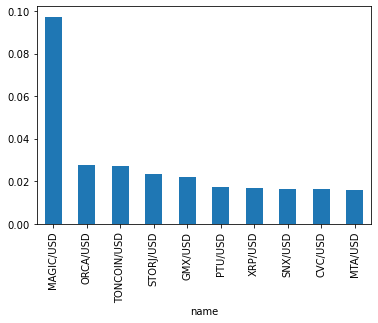

In [31]:
spot_df.change1h.sort_values(ascending = False).head(10).plot(kind='bar')